Before we start! 
   Chắc hẳn mọi người cũng đã nghe nhiều về KickStarter. Nếu ai chưa biết thì đây là một nền tảng crowdfunding , cho phép những nhà kinh doanh có khả năng phát triển sản phẩm trình bày dự án của mình, nhằm gọi vốn từ người dùng trên Kickstarter ở phạm vi toàn cầu.
   Chúng ta có một list data về các dự án KickStarter (chưa rõ trong khoảng thời gian nào), vậy chúng ta thử tổng hợp xem có thể đạt được vài thông tin thú vị không nhé? 
   + Tìm hiểu xem các dự án trên KickStarter thường thuộc những lĩnh vực nào trong cuộc sống, và xu hướng qua các năm
   + Tìm hiểu các backers đến từ những quốc gia nào, và tìm hiểu xem KickStarter đã lan rộng ra toàn thế giới với tốc độ ra sao
   + List ra các dự án thành công và cùng tính toán các metric để phỏng đoán/ tìm hiểu lý do?
   + List ra các dự án thất bại và cùng tính toán các metric để phỏng đoán/ tìm hiểu lý do?
   + Tỉ lệ phần trăm thành công, thất bại,... qua các năm để xem sự phát triển của KickStarter
   + Vài thông tin hay ho như dự án "bự"/"bé" nhất qua các năm là dự án gì, các metric thế nào.
Ok, let's do it!

In [16]:
#init
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
#load_data
KickStarter = pd.read_csv('./kickstarter.csv')

Let find out some important Metric and Prepare the data first

In [17]:
KickStarter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


Có vẻ như các data của chúng ta Ít Null (chỉ có phần cột name là có 4 data bị null, list thử xem có nên loại bỏ hay không? )

In [18]:
KickStarter[KickStarter['name'].isnull() == True]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
166851,1848699072,NaN,Narrative Film,Film & Video,USD,2012-02-29,200000.0,2012-01-01 12:35:31,100.0,failed,1,US,100.00,100.00,200000.00
307234,634871725,NaN,Video Games,Games,GBP,2013-01-06,2000.0,2012-12-19 23:57:48,196.0,failed,12,GB,317.73,316.05,3224.97
309991,648853978,NaN,Product Design,Design,USD,2016-07-18,2500.0,2016-06-18 05:01:47,0.0,suspended,0,US,0.00,0.00,2500.00
338931,796533179,NaN,Painting,Art,USD,2011-12-05,35000.0,2011-11-06 23:55:55,220.0,failed,5,US,220.00,220.00,35000.00


   Có thể thấy là chúng ta thật sự chưa hiểu về các thông số. Cần phân biệt các cặp : (usd_goal_real và goal), (usd pledged và pledged), còn usd_pledged_real là cái gì nữa :( 
   Sau khi lọ mọ thì ta thấy rằng các con số khác nhau là do mục tiền tệ currency : vd như cột 2, 2000GBP = 3224.97USD vào thời điểm 2012 (ti giá là xấp xỉ 1.6 chứ ko phải 1.3 như bây giờ - làm hoang mang dễ sợ), tương tự với cột pledged : 196GBP = 316.05USD (3224.97/2000*196) 
<img src="GBPtoUSD2012.PNG"> 
Còn sự khác nhau của usd pledged và usd_pledged_real :
+ usd_pledged: conversion in US dollars of the pledged column (conversion done by kickstarter).
+ usd pledge real: conversion in US dollars of the pledged column (conversion from Fixer.io API).
    Chưa rõ cái nào chính xác, chúng ta sẽ kiểm tra sau (có vẻ như Real là chính xác hơn @@ )
+ Đánh giá rằng Name = Null cũng không ảnh hưởng đến data, ta quyết định không loại bỏ.

Okay, tiếp tục : 
+ Ta tìm hiểu xem các dự án trên KickStarter thường thuộc những lĩnh vực nào trong cuộc sống, và xu hướng qua các năm

In [49]:
KickStarter['main_category'].unique()

array(['Publishing', 'Film & Video', 'Music', 'Food', 'Design', 'Crafts',
       'Games', 'Comics', 'Fashion', 'Theater', 'Art', 'Photography',
       'Technology', 'Dance', 'Journalism'], dtype=object)

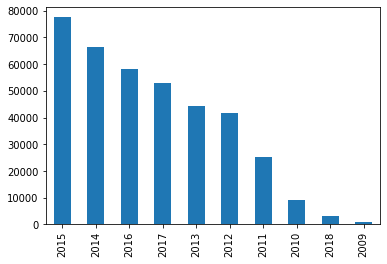

In [20]:
KickStarter['deadline'] = pd.to_datetime(KickStarter.deadline)
KickStarter.deadline.dt.year.value_counts().plot(kind = 'bar')

Có thể nhận xét rằng các dự án từ 2009-2015 tăng dần rất mạnh, nhưng đến 2016 đã bđ giảm nhẹ, 2017 cũng giảm, 2018 có thể hết dữ liệu khảo sát

In [46]:
KickStarter.groupby(KickStarter.deadline.dt.year)['main_category'].value_counts().to_frame()[:50]

main_category
deadline main_category               
2009     Film & Video             208
         Music                    189
         Art                      127
         Publishing                88
         Photography               53
         Technology                42
         Theater                   38
         Games                     33
         Journalism                30
         Design                    23
         Food                      22
         Fashion                   21
         Comics                    16
         Crafts                     7
         Dance                      5
2010     Film & Video            3125
         Music                   2087
         Art                      778
         Publishing               626
         Theater                  551
         Photography              387
         Food                     244
         Comics                   230
         Games                    219
         Technology               203
         Journalism               173
         Design                   142
         Fashion                  142
         Dance                    137
         Crafts                    54
2011     Film & Video            7890
         Music                   6348
         Art                     2229
         Publishing              2072
         Theater                 1425
         Photography              884
         Design                   770
         Games                    698
         Comics                   582
         Fashion                  561
         Food                     542
         Technology               422
         Dance                    400
         Journalism               173
         Crafts                   111
2012     Film & Video            9668
         Music                   9066
         Publishing              5315
         Art                     3464
         Games                   2673

2009 Film & Video -> Music ->Art -> Publishing -> Photography -> Technology 

2010  Film & Video -> Music ->Art -> Publishing -> Theater -> Photography

2011 Film & Video -> Music ->Art -> Publishing -> Theater -> Photography

2012 Film & Video -> Music -> Publishing -> Art -> Games -> Design

2013 Film & Video -> Music -> Publishing ->  Games -> Art -> Design

2014  Film & Video -> Music -> Publishing ->  Food -> Technology -> Games

2015 Film & Video -> Technology -> Music ->  Publishing -> Games -> Design

2016  Film & Video -> Technology -> Games ->  Design -> Music -> Publishing

2017 Games -> Technology -> Design ->  Film & Video -> Publishing

2018 Technology -> Film & Video -> Design ->  Publishing -> Games -> Music

Có thể dễ dàng nhận xét các dự án trên KickStart có sự chuyển dịch xu hướng nhưng trong Catalog Film & Videos vẫn chiếm đa số


Ta tiếp tục tìm hiểu 
+ Tìm hiểu các backers đến từ những quốc gia nào, và tìm hiểu xem KickStarter đã lan rộng ra toàn thế giới với tốc độ ra sao

In [47]:
KickStarter.groupby(KickStarter.deadline.dt.year)['country'].value_counts().to_frame()[:50]

country
deadline country         
2009     US           902
2010     US          9098
2011     US         25107
2012     US         41197
         GB           361
         N,0"           2
2013     US         38424
         GB          4905
         CA           685
         AU           104
         NZ            45
         N,0"          15
2014     US         50024
         GB          7985
         CA          4054
         AU          2149
         NL           693
         N,0"         641
         NZ           381
         SE           113
         DK            78
         IE            59
         NO            54
2015     US         53932
         GB          8100
         CA          4304
         AU          2324
         N,0"        2323
         DE          1221
         NL          1010
         FR           801
         SE           637
         IT           593
         ES           476
         DK           416
         NZ           403
         IE           273
         NO           265
         AT           139
         BE           136
         CH           132
         LU            13
2016     US         38725
         GB          6145
         CA          2907
         AU          1652
         DE          1439
         IT          1117
         FR          1082
         ES           869

Ta có thể thấy sự lan rộng của phong trào KickStart ra toàn thế giới nói chung và trên đất nước Mỹ nói riêng. Ta sẽ biểu diễn trên Google Cloud sau về sự lan rộng này.

Tiếp tục là : 
+ List ra các dự án thành công và cùng tính toán các metric để phỏng đoán/ tìm hiểu lý do?

In [58]:
KickStarter['state'].unique()
#list ra các state

array(['failed', 'canceled', 'successful', 'live', 'undefined',
       'suspended'], dtype=object)

In [60]:
KickStarter[KickStarter['state'] == 'successful']

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
11,100005484,Lisa Lim New CD!,Indie Rock,Music,USD,2013-04-08,12500.0,2013-03-09 06:42:58,12700.00,successful,100,US,12700.00,12700.00,12500.00
14,1000057089,Tombstone: Old West tabletop game and miniatur...,Tabletop Games,Games,GBP,2017-05-03,5000.0,2017-04-05 19:44:18,94175.00,successful,761,GB,57763.78,121857.33,6469.73
18,1000070642,Mike Corey's Darkness & Light Album,Music,Music,USD,2012-08-17,250.0,2012-08-02 14:11:32,250.00,successful,7,US,250.00,250.00,250.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378642,999929142,ÉPOUVANTAILS : 28mm Figurines de jeux pour KIN...,Tabletop Games,Games,EUR,2017-10-31,1000.0,2017-10-04 11:26:44,1246.00,successful,35,FR,66.72,1452.47,1165.70
378644,999934908,The Manual Bar Blade,Product Design,Design,USD,2015-12-15,3500.0,2015-11-23 07:33:14,6169.00,successful,120,US,6169.00,6169.00,3500.00
378646,999943841,The Dog Coffee Book,Children's Books,Publishing,USD,2013-11-30,950.0,2013-10-18 21:35:04,1732.02,successful,31,US,1732.02,1732.02,950.00
378651,999969812,AT THE BEACH,Classical Music,Music,CAD,2014-03-22,5000.0,2014-02-20 01:00:16,5501.00,successful,78,CA,5019.92,4983.69,4529.81


In [ ]:
Có tới 133956 dự án thành công, ta thử tính xem các metric : 